**Breast Cancer Detection**
![](https://blogs.nvidia.com/wp-content/uploads/2018/01/AI_Mammographie.jpg)

***Domain Background*** : 
	Breast Cancer is the most common type of cancer in woman worldwide accounting for 20% of all cases.
    
>     In 2012 it resulted in 1.68 million new cases and 522,000 deaths.
    
One of the major problems is that women often neglect the symptoms, which could cause more adverse effects on them thus lowering the survival chances. In developed countries, the survival rate is although high, but it is an area of concern in the developing countries where the 5-year survival rates are poor. In India, there are about one million cases every year and the five-year survival of stage IV breast cancer is about 10%. Therefore it is very important to detect the signs as early as possible. 
    
>     Invasive ductal carcinoma (IDC) is the most common form of breast cancer.
   
   About 80% of all breast cancers are invasive ductal carcinomas. Doctors often do the biopsy or a scan if they detect signs of IDC. The cost of testing for breast cancer sets one back with $5000, which is a very big amount for poor families and also manual identification of presence and extent of breast cancer by a pathologist is critical. Therefore automation of detection of breast cancer using Histopathology images could reduce cost and time as well as improve the accuracy of the test. This is an active research field lot of research papers and articles are present online one that I like is -(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5453426/) as they used deep learning approach to study on histology images and achieved the sensitivity of 95 which is greater than many pathologists (~90). This shows the power of automation and how it could help in the detection of breast cancer.



***Problem Statement***: 
The idea is to use pathology test images and classify them as IDC(+) and IDC(-). Accurately identifying and categorizing breast cancer subtypes is an important clinical task, and automated methods can be used to save time and reduce error. The pathological tests include images of the tissues, the task is to train a computer to use these images and respond on whether the person is IDC(+) or IDC(-). Since it is a medical field problem it is important that sensitivity of the output should be high. 


***Solution Statement***:
	Our data involves images with the classes written on data file name, therefore, we would need to extract the class name from it and create a column to store them. We also need to split the dataset into the training set, validation set and testing set. Testing set for checking how good the model works on completely unseen data and validation set to check and avoid underfit or overfit, the will also help to select the best model. One hot encoding will be done in classes column so that it could work better with our model. Image processing step is also required to reduce the pixel range from 0-250 to 0-1. After it CNN model is to be used to predict the class, CNN creates an effective architecture the 2D structure of the image, therefore, it would be the best to use, considering that we are working with the images.


***Evaluation Metrics***:
	The performance of the model will be evaluated using ROC curve and confusion matrix.  A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1 − specificity). It uses the concept of true positive, true negative, false positive and false negative.
    
> * Sensitivity =                True Positive /(True Positive + False Negative)
> * Recall    =                   True Positive/(True Positive + False Negative)               .                  
> * Specificity =                True Negative /(  True Negative + False Positive)              .
> * Precision =                True Positive/ ( True Positive + False Positive)
                     
The perfect classification has the area under the ROC curve equal to 1. Therefore closer the area of our ROC curve to 1 better would be our model. The third is a confusion matrix, it is a two by two table that contains four outcomes produced by a binary classifier. Various measures, such as error-rate, accuracy, specificity, sensitivity, and precision, are derived from the confusion matrix. Sensitivity can be calculated from the confusion matrix, which is important to know when we work in the medical domain i.e how many of the patients were told about having breast cancer our of how many were actually having it.
The ROC curve and confusion matrix would be a good evaluation matrix because they both are used for binary classification and our data is also based on binary classification. These metrics could help in evaluating the model through sensitivity, specificity, recall and precision which all are important and are always considered while working in this domain with it would provide us with the visualization of the correctness of the model.



**IMPORT FILES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

**Local Directory**

We explore the name of the directory inside which our datafiles are present.

In [2]:
print(os.listdir("../project"))

['.ipynb_checkpoints', 'Breast cancer', 'kernel.ipynb', 'output.csv', 'test', 'train', 'valid', 'weights.best.cnn.hdf5', 'weights.best.cnnarg.hdf5']


**Data Exploration**

In data exploration we will first check the name of the files.

In [3]:
from glob import glob
Data = glob('../project/Breast Cancer/**/*', recursive=True)    

In [4]:
print(Data[50])

../project/Breast Cancer\12817


Second step  is that we need to check whether all files are images or not

In [5]:
extention=list()
for image in Data:
    ext=image[-3:]
    if ext not in extention:
        extention.append(ext)
print((extention))

['253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '264', '268', '269', '272', '273', '274', '275', '276', '277', '278', '279', '282', '285', '286', '288', '290', '291', '292', '293', '295', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '241', '242', '626', '748', '749', '750', '751', '752', '810', '811', '817', '818', '819', '820', '821', '822', '823', '824', '826', '867', '868', '869', '870', '871', '872', '873', '875', '876', '877', '878', '879', '880', '881', '882', '883', '884', '886', '890', '891', '892', '893', '894', '895', '896', '897', '898', '900', '901', '905', '906', '907', '908', '909', '910', '911', '929', '930', '931', '932', '933', '934', '935', '947', '948', '949', '951', '954', '955', '018', '019', '020', '021', '022', '023', '024', '025', '106', '400', '401', '402', '403', '404', '458', '459', '460', '461', '462', '591', '613', '616', '617', '666', '687', '688', '689', '691', '692', '693', '694', '916', '078', '079', '081'

> **Code Conclusion** : We can see that there are many files along with images but we need to extract only images.

We can see that the extentions are mostly just numbers, therefore we will exclude them and check for extentions that are alphabets

In [6]:
alpha_ext=list()
for ex in extention:
    if ex.isalpha() == True:
        alpha_ext.append(ex)
print(alpha_ext)

['png']


> **Code Conclusion :**  There are only png extentions which are present in alphabets therefore it means that we have only one image extention files with *.png* extentions.

Now we need to remove all the other files that we have imported

In [18]:
Data = glob('../project/Breast Cancer/**/*.png', recursive=True) 

In [19]:
print(len(Data))

277524


> **Code Conclusion **: We have total of 277524 image files

Third step is that we need to check where dimentions of all the images are same or not

> ***Code Conclusion : *** We can see that the dimentions of images are not equal therefore we would make it all equal .

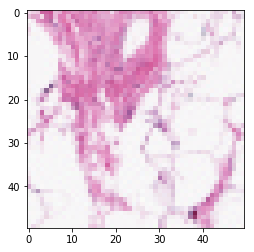

In [20]:
import cv2
import matplotlib.pyplot as plt
def view_images(image):
    image_cv = cv2.imread(image)
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
view_images(Data[52])

In [21]:

'''from PIL import Image
from tqdm import tqdm
dimentions=list()
for images in tqdm(Data):
    dim = Image.open(images)
    if dim not in dimentions:
        dimentions.append(dim)
print(dimentions)'''


'from PIL import Image\nfrom tqdm import tqdm\ndimentions=list()\nfor images in tqdm(Data):\n    dim = Image.open(images)\n    if dim not in dimentions:\n        dimentions.append(dim)\nprint(dimentions)'

> ***Code Conclusion :*** We can see that images are very small, though they are cropped images, its hard for human eye to understand them without using some high costly machines. 

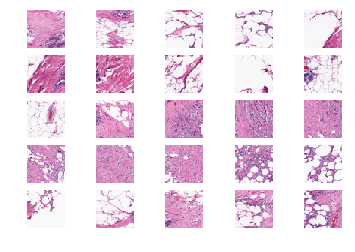

In [22]:
def plot_images(photos) :
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

Now lets look at the color ranges that our images have

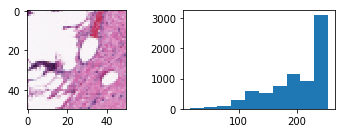

In [23]:
def hist_plot(image):
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    view_images(image)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
hist_plot(Data[25])
    

> ***Code Conclusion :*** From the above image we can conclude that brighter region is more than the darken region in our image.  

***Data Extraction***

Next step is we need to extract the class names in which each files belong from its file names. We will save it in output.csv file.

In [24]:
from tqdm import tqdm
import csv
Data_output=list()
Data_output.append(["Classes"])
for file_name in tqdm(Data):
    Data_output.append([file_name[-10:-4]])
with open("output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])


100%|██████████████████████████████████████████████████████████████████████| 277524/277524 [00:00<00:00, 567872.54it/s]

Below code reads the data from output.csv and displays it

In [25]:
from IPython.display import display # Allows the use of display() for DataFrames
data_output = pd.read_csv("output.csv")
display(data_output.head(5))
print(data_output.shape)

,Classes
0,class0
1,class0
2,class0
3,class0
4,class0


(277524, 1)


> *Class1* represents** IDC(+)** and* Class0* represents** IDC(-)**

**Data Visualization**

Classes    class0
Name: 50, dtype: object

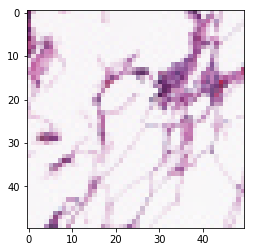

In [26]:
def class_output(images,x):
    display(data_output.loc[50])
    view_images(images)
class_output(Data[50],50) 

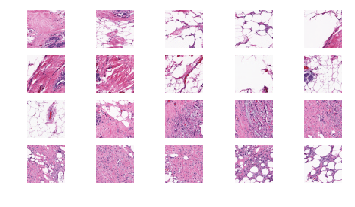

In [27]:
def vis_data(photos,a) :
    x=0
    beta=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.figure(figsize=(50,50))
        plt.subplot(2, 5, x+1)
        plt.title('IDC(+)'if data_output.loc[beta]== 'class1' else 'IDC(-)')
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        
        x+=1
        beta+=1
plot_images(Data[0:20])

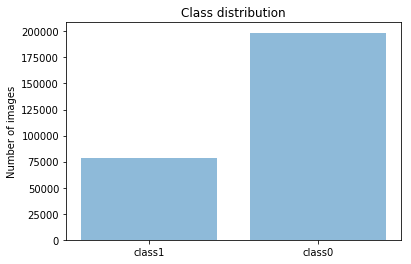

In [28]:
class1 = data_output[(data_output["Classes"]=="class1" )].shape[0]
class0 = data_output[(data_output["Classes"]=="class0" )].shape[0]
objects=["class1","class0"]
y_pos = np.arange(len(objects))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()

> ***Code Conclusion :*** We have more number of images in class0 than in class1

In [29]:
percent_class1=class1/len(Data)
percent_class0=class0/len(Data)
print("Total Class1 images :",class1)
print("Total Class0 images :",class0)
print("Percent of class 0 images : ", percent_class0*100)
print("Percent of class 1 images : ", percent_class1*100)

Total Class1 images : 78786
Total Class0 images : 198738
Percent of class 0 images :  71.61110390452717
Percent of class 1 images :  28.388896095472827


> ***Data Processing  *** 

We would encode our output data which is present as Class1 and Class0 to 1 and 0 repectively to make it work better with our algorithms.

In [30]:
print(data_output)

       Classes
0       class0
1       class0
2       class0
3       class0
4       class0
5       class0
6       class0
7       class0
8       class0
9       class0
10      class0
11      class0
12      class0
13      class0
14      class0
15      class0
16      class0
17      class0
18      class0
19      class0
20      class0
21      class0
22      class0
23      class0
24      class0
25      class0
26      class0
27      class0
28      class0
29      class0
...        ...
277494  class1
277495  class1
277496  class1
277497  class1
277498  class1
277499  class1
277500  class1
277501  class1
277502  class1
277503  class1
277504  class1
277505  class1
277506  class1
277507  class1
277508  class1
277509  class1
277510  class1
277511  class1
277512  class1
277513  class1
277514  class1
277515  class1
277516  class1
277517  class1
277518  class1
277519  class1
277520  class1
277521  class1
277522  class1
277523  class1

[277524 rows x 1 columns]


Next step is that we need to split our data in train and test . Since our data is uneven we will use statify along with our train_test_split.

In [31]:
from sklearn.utils import shuffle
Data,data_output= shuffle(Data,data_output)

In [32]:
from tqdm import tqdm
data=list()
for img in tqdm(Data):
    image_ar = cv2.imread(img)
    data.append(cv2.resize(image_ar,(50,50),interpolation=cv2.INTER_CUBIC))


  1%|█                                                                          | 4079/277524 [00:07<07:49, 582.01it/s]


  3%|██▎                                                                        | 8528/277524 [00:14<07:25, 604.21it/s]


  5%|███▍                                                                      | 13107/277524 [00:21<07:06, 620.01it/s]


  6%|████▋                                                                     | 17590/277524 [00:28<06:56, 623.35it/s]


  8%|█████▉                                                                    | 22383/277524 [00:35<06:41, 634.73it/s]


 10%|███████▏                                                                  | 26966/277524 [00:42<06:33, 636.01it/s]


 11%|████████▍                                                                 | 31470/277524 [00:49<06:26, 635.99it/s]


 13%|█████████▌                                                                | 36080/277524 [00:56<06:18, 637.22it/s]


 15%|██████████▊                                                               | 40645/277524 [01:04<06:14, 633.29it/s]


 16%|████████████                                                              | 45240/277524 [01:11<06:05, 634.75it/s]


 18%|█████████████▎                                                            | 50063/277524 [01:18<05:56, 638.49it/s]


 20%|██████████████▋                                                           | 54871/277524 [01:25<05:46, 641.86it/s]


 21%|███████████████▉                                                          | 59560/277524 [01:32<05:38, 643.70it/s]


 23%|█████████████████▏                                                        | 64404/277524 [01:39<05:29, 646.52it/s]


 25%|██████████████████▍                                                       | 69155/277524 [01:46<05:21, 648.55it/s]


 27%|███████████████████▊                                                      | 74126/277524 [01:53<05:12, 651.91it/s]


 29%|█████████████████████                                                     | 79124/277524 [02:00<05:03, 654.54it/s]


 30%|██████████████████████▍                                                   | 83984/277524 [02:07<04:54, 656.40it/s]


 32%|███████████████████████▋                                                  | 88796/277524 [02:15<04:47, 657.15it/s]


 34%|████████████████████████▉                                                 | 93442/277524 [02:22<04:40, 656.37it/s]


 35%|██████████████████████████                                                | 97893/277524 [02:29<04:34, 653.91it/s]


 37%|██████████████████████████▉                                              | 102515/277524 [02:36<04:27, 653.83it/s]


 39%|████████████████████████████▏                                            | 106973/277524 [02:44<04:21, 652.01it/s]


 40%|█████████████████████████████▍                                           | 111796/277524 [02:51<04:13, 653.30it/s]


 42%|██████████████████████████████▋                                          | 116519/277524 [02:58<04:06, 652.88it/s]


 44%|███████████████████████████████▉                                         | 121320/277524 [03:05<03:58, 653.58it/s]


 45%|█████████████████████████████████▏                                       | 126194/277524 [03:12<03:51, 654.90it/s]


 47%|██████████████████████████████████▍                                      | 131148/277524 [03:19<03:43, 656.14it/s]


 49%|███████████████████████████████████▊                                     | 135914/277524 [03:27<03:35, 656.51it/s]


 51%|█████████████████████████████████████                                    | 140779/277524 [03:34<03:27, 657.45it/s]


 52%|██████████████████████████████████████▎                                  | 145505/277524 [03:41<03:20, 657.76it/s]


 54%|███████████████████████████████████████▍                                 | 150121/277524 [03:48<03:13, 657.49it/s]


 56%|████████████████████████████████████████▋                                | 154835/277524 [03:55<03:06, 657.50it/s]


 57%|█████████████████████████████████████████▉                               | 159526/277524 [04:02<02:59, 657.62it/s]


 59%|███████████████████████████████████████████▏                             | 163965/277524 [04:10<02:53, 654.73it/s]


 61%|████████████████████████████████████████████▍                            | 168782/277524 [04:17<02:45, 655.31it/s]


 63%|█████████████████████████████████████████████▋                           | 173587/277524 [04:24<02:38, 655.75it/s]


 64%|██████████████████████████████████████████████▉                          | 178313/277524 [04:31<02:31, 655.63it/s]


 66%|████████████████████████████████████████████████▏                        | 183318/277524 [04:39<02:23, 656.61it/s]


 68%|█████████████████████████████████████████████████▍                       | 188019/277524 [04:46<02:16, 656.56it/s]


 69%|██████████████████████████████████████████████████▋                      | 192838/277524 [04:53<02:08, 656.85it/s]


 71%|███████████████████████████████████████████████████▉                     | 197646/277524 [05:00<02:01, 657.27it/s]


 73%|█████████████████████████████████████████████████████▎                   | 202597/277524 [05:07<01:53, 658.08it/s]


 75%|██████████████████████████████████████████████████████▌                  | 207531/277524 [05:15<01:46, 658.51it/s]


 77%|███████████████████████████████████████████████████████▉                 | 212600/277524 [05:22<01:38, 659.56it/s]


 78%|█████████████████████████████████████████████████████████▏               | 217534/277524 [05:29<01:30, 660.27it/s]


 80%|██████████████████████████████████████████████████████████▌              | 222559/277524 [05:36<01:23, 661.31it/s]


 82%|███████████████████████████████████████████████████████████▉             | 227764/277524 [05:43<01:15, 662.46it/s]


 84%|█████████████████████████████████████████████████████████████▏           | 232752/277524 [05:51<01:07, 662.93it/s]


 86%|██████████████████████████████████████████████████████████████▌          | 237625/277524 [05:58<01:00, 663.36it/s]


 87%|███████████████████████████████████████████████████████████████▊         | 242487/277524 [06:05<00:52, 663.53it/s]


 89%|█████████████████████████████████████████████████████████████████        | 247433/277524 [06:12<00:45, 664.17it/s]


 91%|██████████████████████████████████████████████████████████████████▎      | 252294/277524 [06:19<00:37, 664.46it/s]


 93%|███████████████████████████████████████████████████████████████████▋     | 257198/277524 [06:26<00:30, 664.94it/s]


 94%|████████████████████████████████████████████████████████████████████▉    | 261978/277524 [06:33<00:23, 664.98it/s]


 96%|██████████████████████████████████████████████████████████████████████▏  | 266914/277524 [06:41<00:15, 665.55it/s]


 98%|███████████████████████████████████████████████████████████████████████▌ | 271930/277524 [06:48<00:08, 666.26it/s]


100%|████████████████████████████████████████████████████████████████████████▊| 276847/277524 [06:55<00:01, 666.49it/s]


100%|█████████████████████████████████████████████████████████████████████████| 277524/277524 [06:56<00:00, 666.41it/s]

In [33]:
Data=None

In [34]:
data_output=data_output.replace(to_replace="class0",value=0)
data_output=data_output.replace(to_replace="class1",value=1)

In [35]:
from sklearn.model_selection import train_test_split
data=np.array(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, data_output, test_size=0.2)
print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 222019
Number of test files 55505
Number of train_target files 222019
Number of  test_target  files 55505


C:\Users\Chandra Kant Shukla\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Chandra Kant Shukla\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


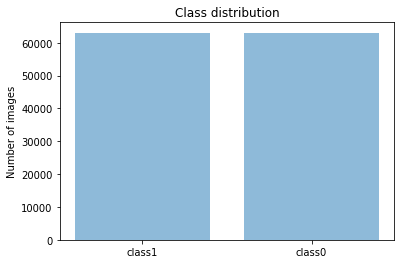

In [36]:
from keras.utils import to_categorical
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#ros = RandomOverSampler(ratio='auto')
ros = RandomUnderSampler(ratio='auto')
X_trainRos, Y_trainRos = ros.fit_sample(X_trainFlat, Y_train)
X_testRos, Y_testRos = ros.fit_sample(X_testFlat, Y_test)
class1=1
class0=0
for i in range(0,len(Y_trainRos)): 
    if(Y_trainRos[i]==1):
        class1+=1
for i in range(0,len(Y_trainRos)): 
    if(Y_trainRos[i]==0):
        class0+=1
objects=["class1","class0"]
y_pos = np.arange(len(objects))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()



Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#print("X_train: ", X_train.shape)
#print("X_trainFlat: ", X_trainFlat.shape)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_testRos Shape: ",X_testRos.shape)
#print("Y_trainRosHot Shape: ",Y_trainRosHot.shape)
#print("Y_testRosHot Shape: ",Y_testRosHot.shape)

for i in range(len(X_trainRos)):
    height, width, channels = 50,50,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 50,50,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
#print("X_testRos Shape: ",X_testRos.shape)
#print("X_testRosReshaped Shape: ",X_testRosReshaped.shape)



We also need a validation set inorder to check overfitting. We can do two things either split test set further into valid set or split train se into valid set.

We will go for spliting training set into validation set.

In [37]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_trainRosReshaped, Y_trainRosHot, test_size=0.2,shuffle=True)

In [38]:
print("Number of train files",len(X_train))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_testRosReshaped))
print("Number of  test_target  files",len(Y_testRosHot))

Number of train files 100876
Number of valid files 25220
Number of train_target files 100876
Number of  valid_target  files 25220
Number of test files 31476
Number of  test_target  files 31476


In [39]:
from sklearn.utils import shuffle
X_testRosReshaped,Y_testRosHot= shuffle(X_testRosReshaped,Y_testRosHot)

In [40]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train,Y_train)

In [41]:
from sklearn.utils import shuffle
X_valid,Y_valid= shuffle(X_valid,Y_valid)

> We need to now preprocess our image file. We change pixels range from 0-255 to 0-1.

In [42]:
x=(X_train[0]/255.0)
print(x)

[[[0.61568627 0.47843137 0.79607843]
  [0.72941176 0.65098039 0.8745098 ]
  [0.70980392 0.60392157 0.88235294]
  ...
  [0.59607843 0.48235294 0.83921569]
  [0.77254902 0.71372549 0.92156863]
  [0.64705882 0.53333333 0.88627451]]

 [[0.64313725 0.50980392 0.66666667]
  [0.72156863 0.59215686 0.85490196]
  [0.71764706 0.61176471 0.85098039]
  ...
  [0.63529412 0.52156863 0.87058824]
  [0.71372549 0.61960784 0.88235294]
  [0.61960784 0.50588235 0.85882353]]

 [[0.76862745 0.68235294 0.81568627]
  [0.70980392 0.60392157 0.82745098]
  [0.71372549 0.59215686 0.78039216]
  ...
  [0.63921569 0.53333333 0.81960784]
  [0.63921569 0.50588235 0.82352941]
  [0.65882353 0.57647059 0.88627451]]

 ...

 [[0.57647059 0.40392157 0.61568627]
  [0.65098039 0.49803922 0.69411765]
  [0.70980392 0.59607843 0.8627451 ]
  ...
  [0.75294118 0.64705882 0.87843137]
  [0.69411765 0.57647059 0.88627451]
  [0.64705882 0.53333333 0.88235294]]

 [[0.68627451 0.55294118 0.78039216]
  [0.76470588 0.6745098  0.80392157]


In [43]:
X_train_norm=list()
X_test_norm=list()
X_valid_norm=list()
for i in range(0,len(X_train)):
    X_train_norm.append(X_train[i]/255.0)
for i in range(0,len(X_testRosReshaped)):
    X_test_norm.append(X_testRosReshaped[i])
for i in range(0,len(X_valid)):
    X_valid_norm.append(X_valid[i]/255.0)
X_train_norm=np.array(X_train_norm)
X_test_norm=np.array(X_test_norm)
X_valid_norm=np.array(X_valid_norm)

In [44]:
display(Y_train.shape)
display(Y_testRosHot.shape)
display(Y_valid.shape)

(100876, 2)

(31476, 2)

(25220, 2)

In [45]:
print(X_train_norm.shape)

(100876, 50, 50, 3)


In [46]:
print("Training Data Shape:", X_train_norm.shape)
print("Validation Data Shape:", X_valid_norm.shape)
print("Testing Data Shape:", X_test_norm.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_testRosHot.shape)

Training Data Shape: (100876, 50, 50, 3)
Validation Data Shape: (25220, 50, 50, 3)
Testing Data Shape: (31476, 50, 50, 3)
Training Label Data Shape: (100876, 2)
Validation Label Data Shape: (25220, 2)
Testing Label Data Shape: (31476, 2)


In [47]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(Y_trainRos), Y_trainRos)
print("Class Weights: ",class_weight)

Class Weights:  [1. 1.]


Now we have our three sets of train, valid and test. We will now create our benchmark model.

> ***BENCHMARK MODEL: *** A simple CNN model

In [37]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(50,50,3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 40002     
Total params: 40,898
Trainable params: 40,898
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:

from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(X_train_norm, Y_train, 
          validation_data=(X_valid_norm, Y_valid),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=2,shuffle=True)

Train on 100708 samples, validate on 25178 samples
Epoch 1/10
 - 79s - loss: 0.4287 - acc: 0.8111 - val_loss: 0.4185 - val_acc: 0.8131

Epoch 00001: val_loss improved from inf to 0.41846, saving model to weights.best.cnn.hdf5
Epoch 2/10
 - 76s - loss: 0.4214 - acc: 0.8137 - val_loss: 0.4197 - val_acc: 0.8142

Epoch 00002: val_loss did not improve from 0.41846
Epoch 3/10
 - 78s - loss: 0.4133 - acc: 0.8190 - val_loss: 0.4112 - val_acc: 0.8179

Epoch 00003: val_loss improved from 0.41846 to 0.41116, saving model to weights.best.cnn.hdf5
Epoch 4/10
 - 74s - loss: 0.4054 - acc: 0.8226 - val_loss: 0.4238 - val_acc: 0.8141

Epoch 00004: val_loss did not improve from 0.41116
Epoch 5/10
 - 73s - loss: 0.3999 - acc: 0.8257 - val_loss: 0.4089 - val_acc: 0.8236

Epoch 00005: val_loss improved from 0.41116 to 0.40890, saving model to weights.best.cnn.hdf5
Epoch 6/10
 - 74s - loss: 0.3955 - acc: 0.8281 - val_loss: 0.4963 - val_acc: 0.7722

Epoch 00006: val_loss did not improve from 0.40890
Epoch 7/

In [53]:
model.load_weights('weights.best.cnn.hdf5')

In [54]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_norm)]

100%|██████████| 31686/31686 [00:18<00:00, 1695.64it/s]


In [55]:
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [56]:
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(Y_testRosHot, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 50.0000%


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(Y_testRosHot, axis=1), np.array(predictions))

array([[15843,     0],
       [15843,     0]], dtype=int64)

***Image Argumentation***

We will now add image argumentation to our data, so that it may be set for wider range of domain

Our image dataset is lerge and imbalanced, therefore to save some memory and to work with imbalanced class we will use a technique known as *undersampling*

In [48]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)
X_train_arg=list()
Y_train_arg=list()
batchSize=32
length=len(X_train_norm)/batchSize
i=0
for X_batch, Y_batch in tqdm(datagen.flow(X_train_norm,y=Y_train,batch_size=batchSize)):
        i+=1
        X_train_arg.append(X_batch)
        Y_train_arg.append(Y_batch)
        if(i>=length):
            break



  6%|████▊                                                                          | 192/3153 [00:10<02:42, 18.21it/s]


 12%|█████████▊                                                                     | 391/3153 [00:20<02:23, 19.22it/s]


 18%|██████████████▏                                                                | 567/3153 [00:30<02:18, 18.72it/s]


 24%|██████████████████▉                                                            | 755/3153 [00:39<02:05, 19.12it/s]


 31%|████████████████████████▏                                                      | 963/3153 [00:48<01:51, 19.72it/s]


 37%|████████████████████████████▊                                                 | 1167/3153 [00:58<01:39, 20.04it/s]


 43%|█████████████████████████████████▉                                            | 1370/3153 [01:08<01:28, 20.11it/s]


 50%|██████████████████████████████████████▊                                       | 1567/3153 [01:17<01:18, 20.20it/s]


 56%|███████████████████████████████████████████▊                                  | 1769/3153 [01:27<01:08, 20.32it/s]


 63%|████████████████████████████████████████████████▊                             | 1973/3153 [01:36<00:57, 20.47it/s]


 69%|█████████████████████████████████████████████████████▊                        | 2177/3153 [01:45<00:47, 20.56it/s]


 75%|██████████████████████████████████████████████████████████▊                   | 2379/3153 [01:55<00:37, 20.63it/s]


 82%|███████████████████████████████████████████████████████████████▉              | 2583/3153 [02:04<00:27, 20.70it/s]


 88%|█████████████████████████████████████████████████████████████████████         | 2790/3153 [02:13<00:17, 20.84it/s]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2990/3153 [02:23<00:07, 20.84it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 3151/3153 [02:31<00:00, 20.86it/s]

In [49]:
print(len(X_train_arg))
print(len(Y_train_arg))

3153
3153



100%|█████████████████████████████████████████████████████████████████████████████▉| 3151/3153 [02:46<00:00, 18.94it/s]

In [50]:
X_train_final=list()
Y_train_final=list()
for x in X_train_arg :
    for i in x:
        X_train_final.append(i)
for x in Y_train_arg :
    for i in x:
        Y_train_final.append(i)


In [51]:
X=np.asarray(X_train_final)

In [52]:
Y=np.asarray(Y_train_final)
print(X.shape)

(100876, 50, 50, 3)


In [65]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=2,padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=2,padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 21634     
Total params: 30,306
Trainable params: 30,306
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 15
batch_size= 32
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.cnnarg.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(X, Y, 
          validation_data=(X_valid_norm, Y_valid),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=2)

Train on 100708 samples, validate on 25178 samples
Epoch 1/10


In [70]:
model.load_weights('weights.best.cnnarg.hdf5')

In [71]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_norm)]


 35%|███▌      | 24577/69381 [00:31<00:57, 783.52it/s]


 71%|███████▏  | 49575/69381 [01:02<00:25, 790.90it/s]


100%|██████████| 69381/69381 [01:28<00:00, 784.04it/s]

In [72]:
print(predictions)

[0 1 0 ... 1 0 0]


In [73]:
test_accuracy_arg = 100*np.sum(np.array(predictions)==np.argmax(Y_testRos, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy_arg)

Test accuracy: 71.6118%


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(test_Y, axis=1), np.array(predictions))

array([[49685,     0],
       [19696,     0]], dtype=int64)

**Transfer Learning**

We will now add transfer learning from various models

In [53]:
from keras.applications.vgg16 import VGG16
arg_model = VGG16(include_top=False)

In [58]:
bottleneck_train=(arg_model.predict((np.expand_dims(X, axis=0))))

In [ ]:
bottleneck_valid=arg_model.predict(X_valid_norm)

In [ ]:
bottleneck_test=arg_model.predict(X_test_norm)

In [36]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Inception_model = Sequential()
Inception_model.add(GlobalAveragePooling2D(input_shape=bottleneck_train.shape[1:]))
Inception_model.add(Dense(32,activation='relu'))
Inception_model.add(Dropout(0.4))
Inception_model.add(Dense(2, activation='softmax'))

Inception_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               409800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 402       
Total params: 410,202
Trainable params: 410,202
Non-trainable params: 0
_________________________________________________________________


In [40]:
Inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.bestarg.InceptionV3.hdf5', verbose=1, save_best_only=True)

In [42]:
Inception_model.fit(bottleneck_train, Y_train_hot, 
          validation_data=(bottleneck_valid, Y_valid_hot),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=0)


C:\Users\Chandra Kant Shukla\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):



Epoch 00001: val_loss did not improve from inf


KeyboardInterrupt: 

In [ ]:
Inception_model.load_weights('saved_models/weights.bestarg.InceptionV3.hdf5')

predictions = [np.argmax(Inception_model.predict(np.expand_dims(feature, axis=0))) for feature in bottleneck_test]

# report test accuracy
test_accuracy_inception = 100*np.sum(np.array(predictions)==np.argmax(test_Y, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy_inception)